In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Importing dataset from previous exercise
path=r'C:\Users\aditi\Desktop\Data Analytics_Career Foundry\Data Analytics_Immersion\Project 4\Instacart Basket Analysis'

In [9]:
df_final=pd.read_pickle(os.path.join(path, 'Data', 'Prepared data', 'df_final_dataset.pkl'))

In [11]:
df_departments=pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'departments_wrangled.csv'))

In [15]:
df_departments.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

# Task 8

In [20]:
df_task_8_9 = df_final.merge(df_departments, on = 'department_id', indicator = 'merge1')

In [24]:
df_task_8_9.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,region,exclusion_flag,day_group,age_group,income_group,department_group,hour_group,department,merge1
0,1.0,Chocolate Sandwich Cookies,61,19,5.8,3139998.0,138,28,6,11,...,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Morning Shopper,snacks,both
1,1.0,Chocolate Sandwich Cookies,61,19,5.8,1977647.0,138,30,6,17,...,both,Midwest,Include,Weekend,Senior,Low Income,Quick meals,Afternoon Shopper,snacks,both
2,1.0,Chocolate Sandwich Cookies,61,19,5.8,389851.0,709,2,0,21,...,both,Northeast,Include,Weekend,Senior,High Income,Quick meals,Night Shopper,snacks,both
3,1.0,Chocolate Sandwich Cookies,61,19,5.8,1701441.0,777,16,1,7,...,both,West,Include,Weekday,Middle-aged Adult,Mid Income,Quick meals,Morning Shopper,snacks,both
4,1.0,Chocolate Sandwich Cookies,61,19,5.8,1871483.0,825,3,2,14,...,both,South,Include,Weekday,Young Adult,Low Income,Quick meals,Afternoon Shopper,snacks,both


In [27]:
df_task_8_9.drop('merge1', axis = 1, inplace = True)

In [28]:
df_task_8_9.drop('_merge', axis = 1, inplace = True)

In [32]:
# Creating crosstab for region and department

region_department = pd.crosstab(df_task_8_9['region'], df_task_8_9['department'], dropna = False)

In [34]:
region_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


In [38]:
region_department.T

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [51]:
# Creating crosstab for region and age group

age_region = pd.crosstab(df_task_8_9['region'], df_task_8_9['age_group'], dropna = False)

In [53]:
age_region

age_group,Middle-aged Adult,Senior,Young Adult
region,,,
Midwest,3345023,2455443,1461047
Northeast,2468980,1884229,1111476
South,4662816,3521421,2126902
West,3609001,2713411,1604815


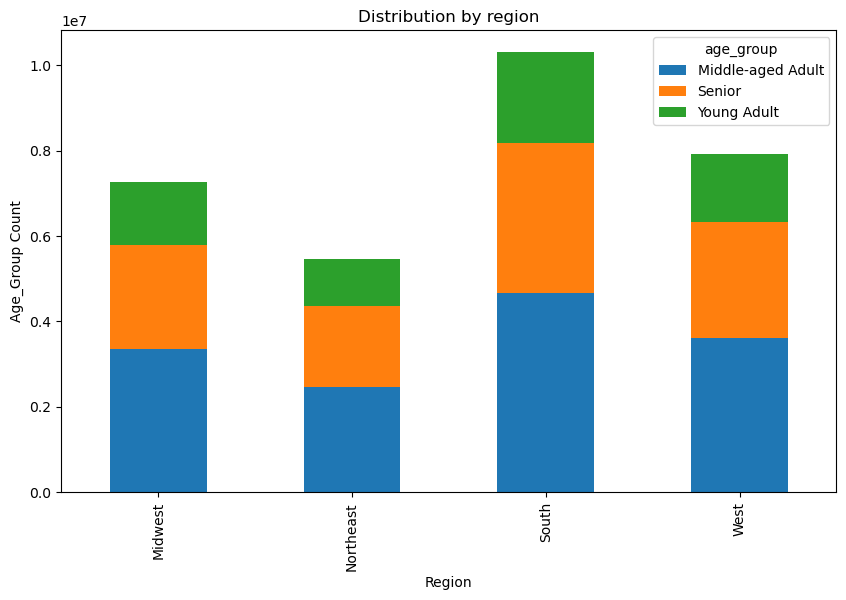

In [75]:
age_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution by region')
plt.xlabel('Region')
plt.ylabel('Age_Group Count')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_region.png'))

In [59]:
# Creating crosstab for region and income group

income_region = pd.crosstab(df_task_8_9['region'], df_task_8_9['income_group'], dropna = False)

In [61]:
income_region

income_group,High Income,Low Income,Mid Income
region,,,
Midwest,917495,783764,5560254
Northeast,677730,587137,4199818
South,1290460,1142572,7878107
West,1009590,849081,6068556


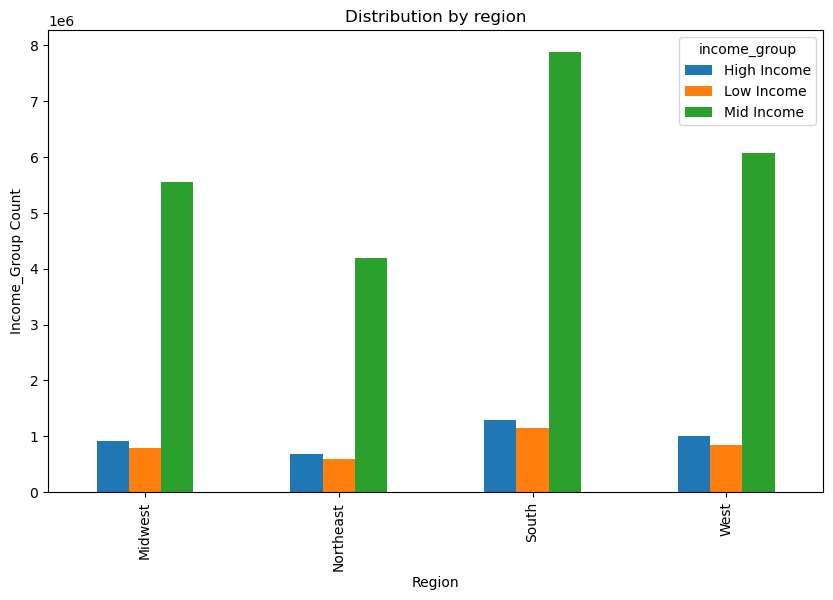

In [112]:
income_region.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution by region')
plt.xlabel('Region')
plt.ylabel('Income_Group Count')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_region.png'))

In [82]:
# Creating crosstab for loyalty_flag and spender_flag

loyalty_spending = pd.crosstab(df_task_8_9['loyalty_flag'], df_task_8_9['spending_flag'], dropna = False)

In [84]:
loyalty_spending

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,84011,4719684
Regular customer,302814,15573962


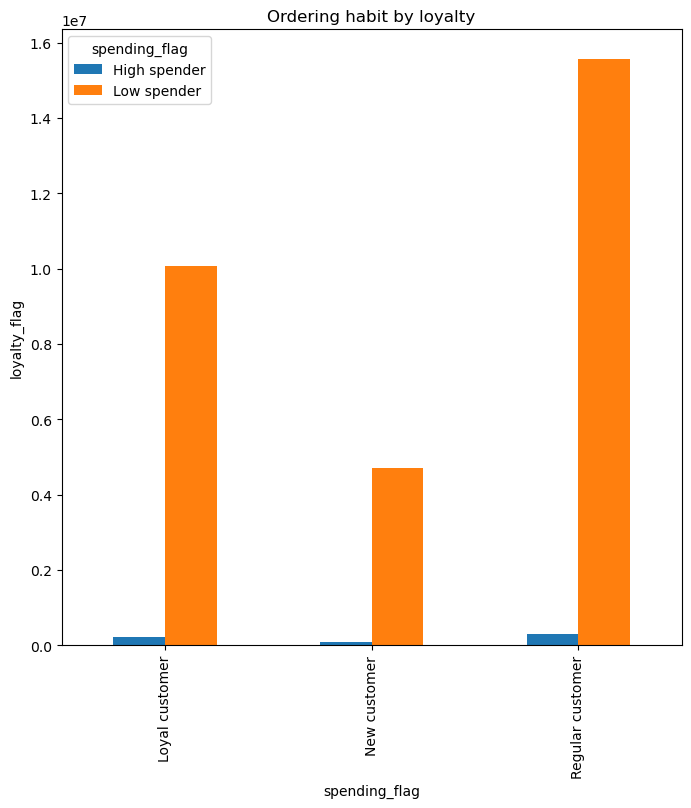

In [110]:
loyalty_spending.plot(kind='bar', figsize=(8,8))
plt.title('Ordering habit by loyalty')
plt.xlabel('spending_flag')
plt.ylabel('loyalty_flag')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_spending.png'))

In [91]:
# Creating crosstab for order_frequency and age_group

order_age = pd.crosstab(df_task_8_9['order_frequency'], df_task_8_9['age_group'], dropna = False)

In [93]:
order_age

age_group,Middle-aged Adult,Senior,Young Adult
order_frequency,,,
Frequent customer,10098920,7589515,4520459
Non-frequent customer,993918,747309,446190
Regular customer,2992982,2237680,1337591


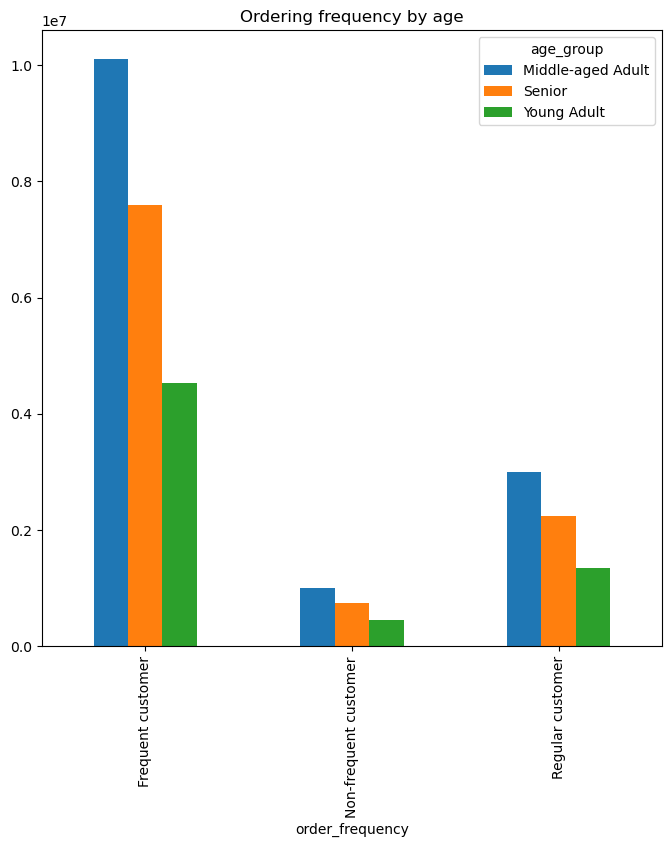

In [127]:
order_age.plot(kind='bar', figsize=(8,8))
plt.title('Ordering frequency by age')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_spending.png'))

In [116]:
ordering_frequency_region = pd.crosstab(df_task_8_9['region'], df_task_8_9['order_frequency'], dropna = False)

In [118]:
ordering_frequency_region

order_frequency,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,5166753,523619,1571141
Northeast,3919693,379091,1165901
South,7407676,732373,2171090
West,5714772,552334,1660121


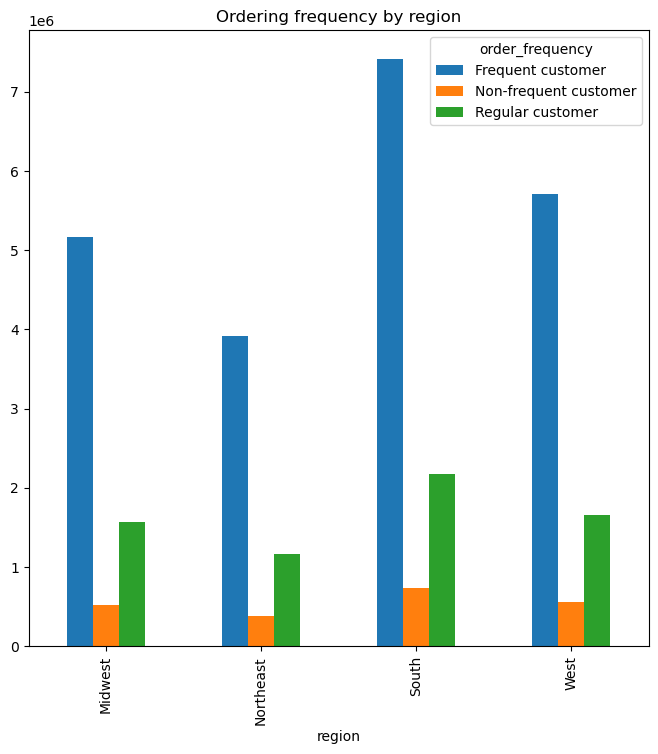

In [124]:
ordering_frequency_region.plot(kind='bar', figsize=(8,8))
plt.title('Ordering frequency by region')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'ordering_frequency_region'))

In [129]:
# create a crosstab between 'region' and 'spending_flag'
region_spending_flag = pd.crosstab(df_task_8_9['region'], df_task_8_9['spending_flag'], dropna = False)

In [131]:
region_spending_flag

spending_flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


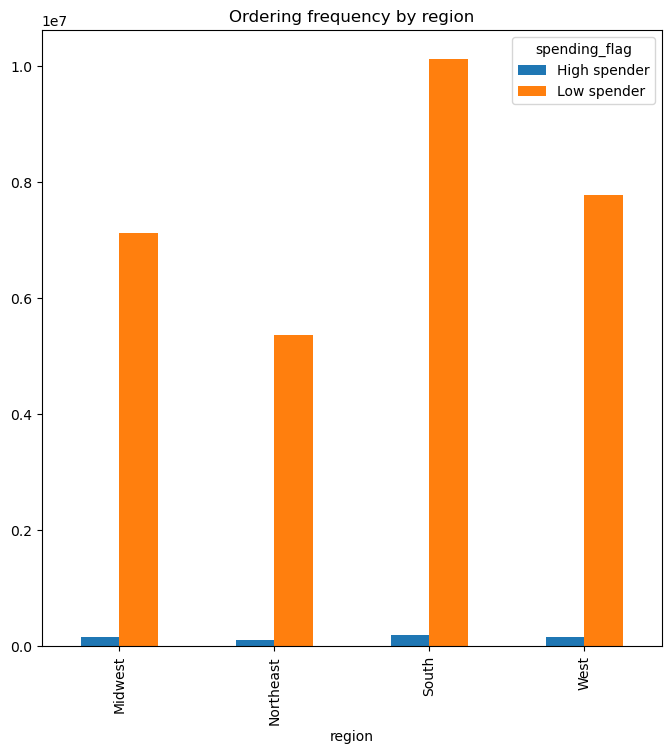

In [133]:
region_spending_flag.plot(kind='bar', figsize=(8,8))
plt.title('Ordering frequency by region')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_spending_flag'))